# Title:  Next Word Prediction with Sherlock Holmes Text using LSTM

# Author:  Abd Ur Rehman

# Date:  12_01_2024

# Project Purpose
## Objective:
### Develop a Next Word Prediction model using Natural Language Processing (NLP) techniques, specifically Long Short-Term Memory (LSTM) networks, to anticipate the next word in sentences from the Sherlock Holmes text dataset.

## Dataset:

### The dataset consists of plain-text versions of the renowned Sherlock Holmes stories by Sir Arthur Conan Doyle. This collection provides a rich source of textual data for training the model.

## Key Tasks:

### 1. Data Preprocessing: Clean and tokenize the text, create sequences of words.
### 2. Model Building: Construct an LSTM-based neural network for sequence prediction.
### 3. Model Training: Train the model on the processed dataset to learn language patterns.
### 4. Evaluation: Assess the model's accuracy in predicting the next word.
### 5. Application: Implement a prediction function and a Flask web application for interactive use.

## Expected Outcome:
### By the end of this project, we aim to have a functional Next Word Prediction model capable of suggesting the most probable word following a given sequence of words from the Sherlock Holmes stories. This model can serve as a foundation for applications such as predictive text input and content generation.

# Data Preprocessing

In [1]:
# Import necessary libraries
import numpy as np
import nltk
import re
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

2024-07-05 09:37:46.769089: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-05 09:37:46.862901: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-05 09:37:47.006509: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-05 09:37:47.137984: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-05 09:37:47.138880: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-05 09:37:47.370899: I tensorflow/core/platform/cpu_feature_guard.cc:

In [2]:
# Download and import necessary NLTK data
nltk.download('punkt')

# Load the dataset
with open('sherlock-holm.es_stories_plain-text_advs.txt', 'r') as file:
    text = file.read()

# Preprocess the text
text = text.lower()  # Convert to lowercase
text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuations and non-alphabetic characters

# Tokenize the text
tokens = nltk.word_tokenize(text)

# Create sequences of words
sequence_length = 5
sequences = []

for i in range(sequence_length, len(tokens)):
    seq = tokens[i-sequence_length:i]
    sequences.append(' '.join(seq))

# Tokenize sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sequences)
sequences = tokenizer.texts_to_sequences(sequences)

# Convert to numpy array
sequences = np.array(sequences)

# Split into input (X) and output (y)
X = sequences[:, :-1]
y = sequences[:, -1]

# One-hot encode the output words
vocab_size = len(tokenizer.word_index) + 1
y = to_categorical(y, num_classes=vocab_size)

# Pad the input sequences
X = pad_sequences(X, maxlen=sequence_length-1, padding='pre')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/abdurrehman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Print the shapes of X and y to verify
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (104478, 4)
Shape of y: (104478, 8336)


# Model Building

In [4]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from keras.optimizers import Adam

# Define the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=sequence_length-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(150)))
model.add(Dropout(0.2))
model.add(Dense(vocab_size, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


/home/abdurrehman/anaconda3/envs/NLP/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2024-07-05 09:37:54.802422: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-05 09:37:54.847360: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


# Model Training

In [5]:
# Train the model
epochs = 100
batch_size = 256

history = model.fit(X, y, epochs=epochs, batch_size=batch_size, validation_split=0.2)


Epoch 1/100


2024-07-05 09:38:00.669627: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2786958208 exceeds 10% of free system memory.


327/327 ━━━━━━━━━━━━━━━━━━━━ 87s 238ms/step - accuracy: 0.0536 - loss: 7.1729 - val_accuracy: 0.0527 - val_loss: 6.3551
Epoch 2/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 82s 237ms/step - accuracy: 0.0637 - loss: 6.2118 - val_accuracy: 0.0659 - val_loss: 6.2027
Epoch 3/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 85s 247ms/step - accuracy: 0.0815 - loss: 5.9431 - val_accuracy: 0.0938 - val_loss: 5.9926
Epoch 4/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 73s 222ms/step - accuracy: 0.1058 - loss: 5.6437 - val_accuracy: 0.1082 - val_loss: 5.8872
Epoch 5/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 85s 232ms/step - accuracy: 0.1192 - loss: 5.4083 - val_accuracy: 0.1151 - val_loss: 5.8474
Epoch 6/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 71s 218ms/step - accuracy: 0.1342 - loss: 5.1827 - val_accuracy: 0.1180 - val_loss: 5.8511
Epoch 7/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 73s 223ms/step - accuracy: 0.1411 - loss: 5.0326 - val_accuracy: 0.1217 - val_loss: 5.8573
Epoch 8/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 78s 239ms/step - accuracy: 0.1517 - loss: 4.852

# Evaluation

In [6]:
# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

2024-07-05 11:51:41.078970: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3483714432 exceeds 10% of free system memory.


3265/3265 ━━━━━━━━━━━━━━━━━━━━ 57s 17ms/step - accuracy: 0.9409 - loss: 0.3953
Loss: 2.1747772693634033
Accuracy: 0.7867876291275024


# plot graph for accuracy and loss

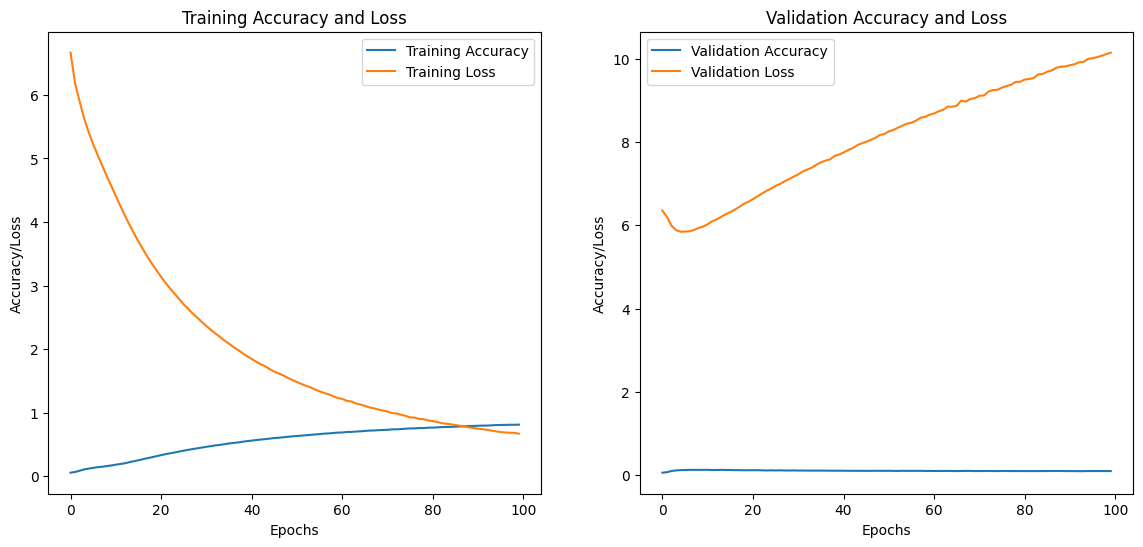

In [7]:
# Plotting the accuracy and loss
# Retrieve training and validation accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Retrieve training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create epochs array for x-axis
epochs_range = range(epochs)

# Plot training accuracy and loss
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend(loc='best')
plt.title('Training Accuracy and Loss')

# Plot validation accuracy and loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend(loc='best')
plt.title('Validation Accuracy and Loss')

plt.show()

# Prediction Function

In [8]:
# Function to predict the next word
def predict_next_word(model, tokenizer, text_seq, seq_length):
    text_seq = text_seq.lower()
    text_seq = re.sub(r'[^a-z\s]', '', text_seq)  # Preprocess input text
    tokens = nltk.word_tokenize(text_seq)
    encoded = tokenizer.texts_to_sequences([tokens])
    encoded = pad_sequences(encoded, maxlen=seq_length-1, padding='pre')
    
    pred_prob = model.predict(encoded, verbose=0)
    pred_word = tokenizer.index_word[np.argmax(pred_prob)]
    
    return pred_word

# Example usage
input_text = "sherlock holmes is"
next_word = predict_next_word(model, tokenizer, input_text, sequence_length)
print(f'Next word prediction: {next_word}')


Next word prediction: quite


In [11]:
import pickle

# Save the model
model.save('next_word_model2.keras')

# Save the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)